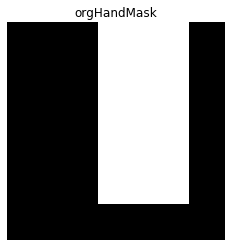

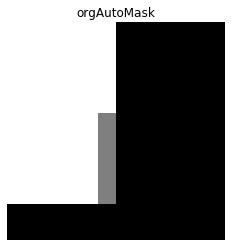

1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
handMaskAccumLum 50.0
TruePositive 7.490196078431373
FalseNegative 42.50980392156862
FalsePositive 50.0
TruePositive 14.980392156862745
FalseNegative 85.01960784313724
FalsePositive 100.0
144


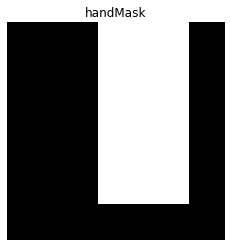

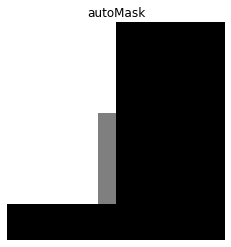

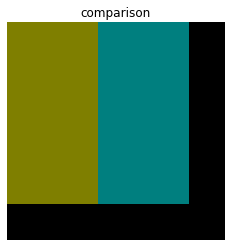

imgSize 144


In [20]:
import cv2
from matplotlib import pyplot as plt
import numpy as np



def imshow(inputImg, title):
    # print(inputImg)
    plt.clf()
    plt.title(title)
    plt.axis("off")
    # print("inputImg.shape", inputImg.shape)
    plt.imshow(cv2.cvtColor(inputImg, cv2.COLOR_BGR2RGB), interpolation='none')
    plt.show()
    # plt.axes
    return inputImg

orgHandMask= cv2.imread("ground.png",cv2.IMREAD_GRAYSCALE)
orgAutoMask  = cv2.imread("test.png",cv2.IMREAD_GRAYSCALE)

imshow(orgHandMask, "orgHandMask")
imshow(orgAutoMask, "orgAutoMask")
autoMask= orgAutoMask.astype("float64")
handMask= orgHandMask.astype("float64")


height,width= autoMask.shape
imgSize=height*width 
TruePositive = 0 
FalsePositive=0
FalseNegative=0
handMaskAccumLum =0
comparison = np.ndarray(shape=(12,12,3), dtype=np.uint8)
for y in range(height):
    for x in range(width):
        #count1 += autoMask[y,x]
        autoMask[y,x]= (orgAutoMask[y,x]/255)
        handMask[y,x]= (orgHandMask[y,x]/255)
        
#        handMask[y,x] = 50
        #imshow(handMask,"handMask")
        
        if (autoMask[y,x] and handMask[y,x]) !=0:
            TruePositive+=autoMask[y,x]/handMask[y,x]
            comparison[y,x] = (0,255,0)
            
        if (autoMask[y,x] < handMask[y,x]):
            FalseNegative+= handMask[y,x]-autoMask[y,x]
            comparison[y,x] = (0,0,255)
            
        if (autoMask[y,x] > handMask[y,x]):
            FalsePositive+= autoMask[y,x] - handMask[y,x]
            comparison[y,x] = (0,127,127)
        if (handMask[y,x] !=0):
            handMaskAccumLum += handMask[y,x]
            comparison[y,x] = (127,127,0)
            print(handMask[y,x])
            
            
autoMask=autoMask*255
handMask=handMask*255



print ("handMaskAccumLum",handMaskAccumLum)

print("TruePositive",TruePositive)
print("FalseNegative",FalseNegative)
print("FalsePositive",FalsePositive)
            
TruePositive= (TruePositive/handMaskAccumLum)*100
FalseNegative=(FalseNegative/handMaskAccumLum) *100
FalsePositive=(FalsePositive/handMaskAccumLum)*100

print("TruePositive",TruePositive)
print("FalseNegative",FalseNegative)
print("FalsePositive",FalsePositive)

print(imgSize)

#imshow(handMask,"handMask")


imshow(orgHandMask,"handMask")
imshow(orgAutoMask,"autoMask")
imshow(comparison,"comparison")




print("imgSize", imgSize)